<a href="https://colab.research.google.com/github/neerajkasturi10/My-Projects/blob/master/Petrol_Prices_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
petrol_prices = pd.read_csv(r"/train_data.csv", parse_dates = [0] 
                            #index_col = 0
                           )

In [ ]:
petrol_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          813 non-null    datetime64[ns]
 1   Petrol (USD)  811 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.8 KB


In [ ]:
petrol_prices['Year'] = petrol_prices['Date'].dt.year

In [ ]:
petrol_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          813 non-null    datetime64[ns]
 1   Petrol (USD)  811 non-null    float64       
 2   Year          813 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 19.2 KB


In [ ]:
petrol_prices.isna().sum()

Date            0
Petrol (USD)    2
Year            0
dtype: int64

In [ ]:
petrol_prices = petrol_prices.interpolate(method='pad')

In [ ]:
petrol_prices.isna().sum()

Date            0
Petrol (USD)    0
Year            0
dtype: int64

In [ ]:
petrol_prices = petrol_prices.set_index('Date')

In [ ]:
petrol_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 813 entries, 2003-06-09 to 2018-12-31
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petrol (USD)  813 non-null    float64
 1   Year          813 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 19.1 KB


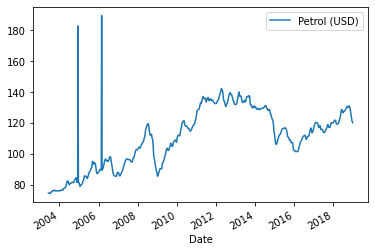

In [ ]:
petrol_prices.plot(y="Petrol (USD)")
#plt.figure(figsize=(16,10))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
result = seasonal_decompose(petrol_prices['Petrol (USD)'], model="additive", freq=7)

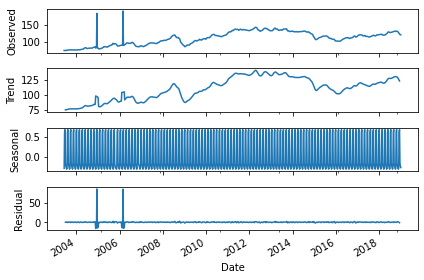

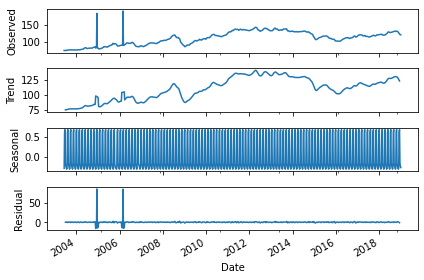

In [ ]:
#plt.figure(figsize=(16,10))
result.plot()
#plt.figure(figsize=(16,10))

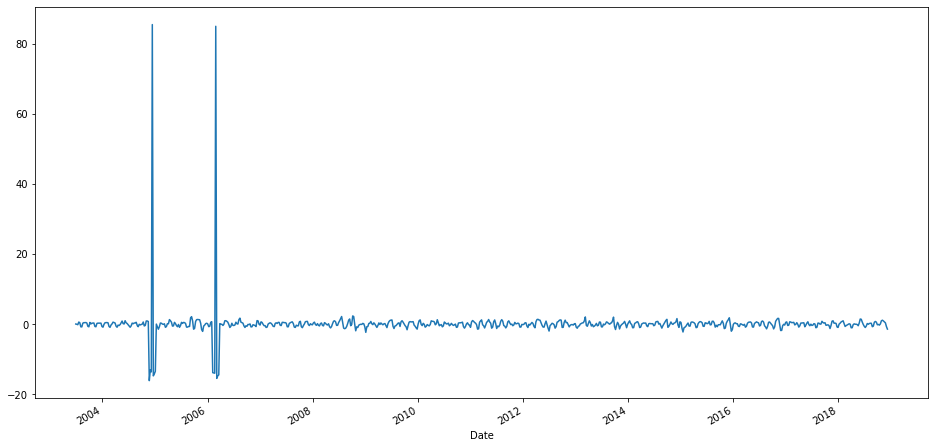

In [ ]:
result.resid.plot(figsize=(16,8))

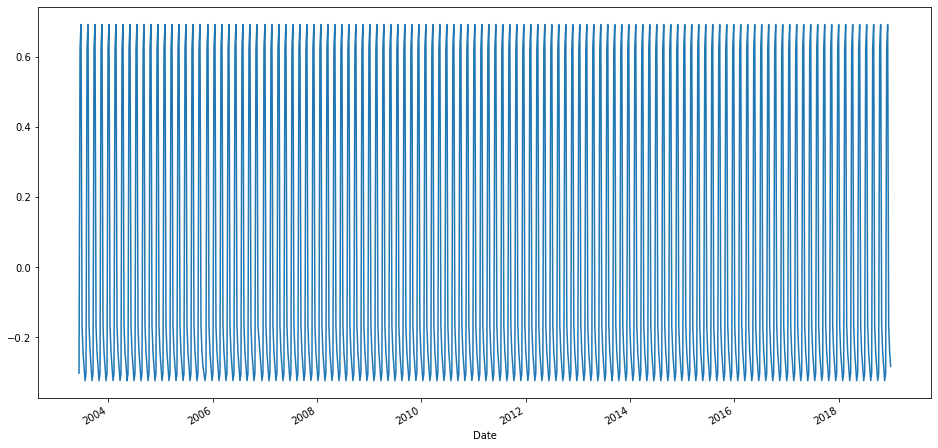

In [ ]:
result.seasonal.plot(figsize=(16,8))

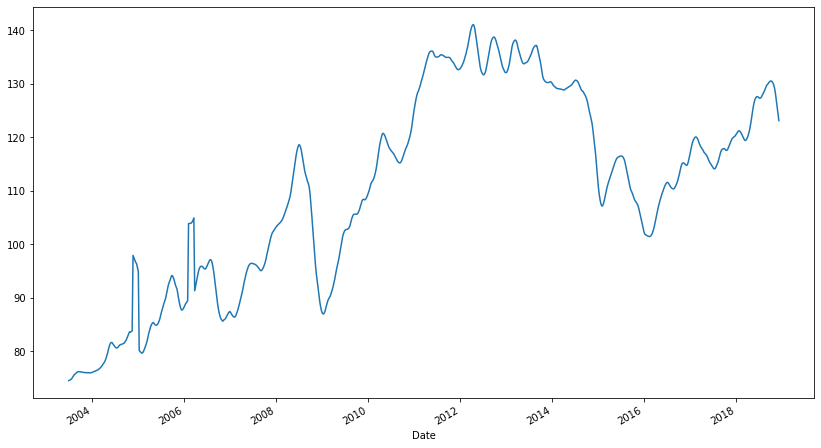

In [ ]:
result.trend.plot(figsize=(14,8))

In [ ]:
result_mul = seasonal_decompose(petrol_prices['Petrol (USD)'], model="multiplicative", freq=7)

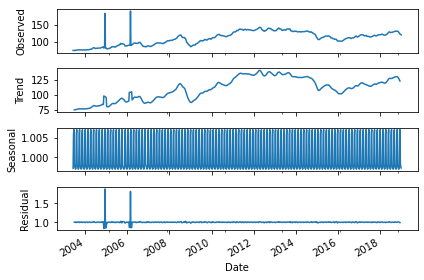

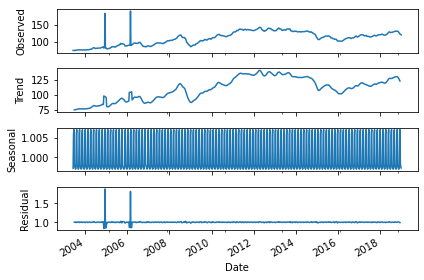

In [ ]:
result_mul.plot()

Now we'll try to remove the Outliers and try to decompose again

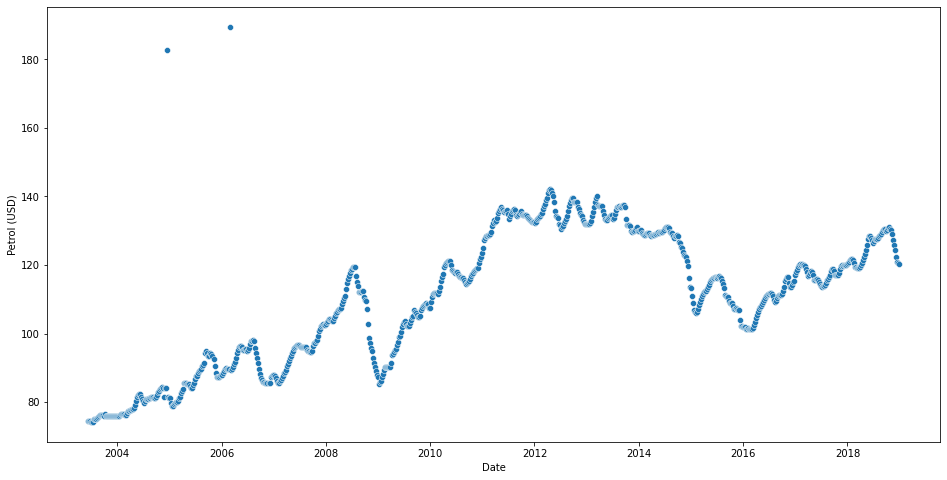

In [ ]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = petrol_prices, x = "Date", y = "Petrol (USD)")

In [ ]:
petrol_prices[petrol_prices['Petrol (USD)'] > 170]['Petrol (USD)'].count()

2

In [ ]:
petrol_prices_out_rm = petrol_prices[petrol_prices['Petrol (USD)'] < 170]
petrol_prices_out_rm.head()

,Petrol (USD),Year
Date,,
2003-06-09,74.59,2003
2003-06-16,74.47,2003
2003-06-23,74.42,2003
2003-06-30,74.35,2003
2003-07-07,74.28,2003


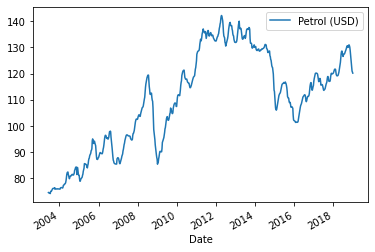

In [ ]:
petrol_prices_out_rm.plot(y="Petrol (USD)")

In [ ]:
result_out_rm = seasonal_decompose(petrol_prices_out_rm['Petrol (USD)'], model="additive", freq=7)

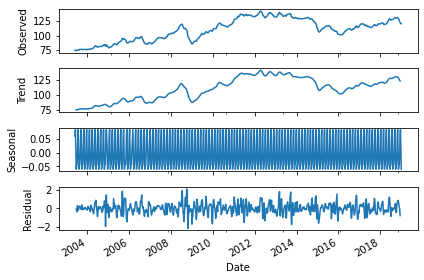

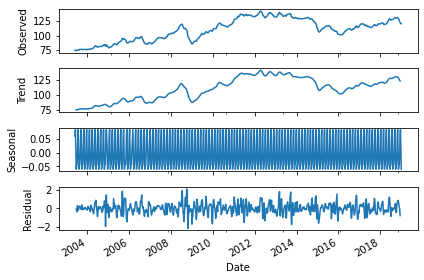

In [ ]:
result_out_rm.plot()

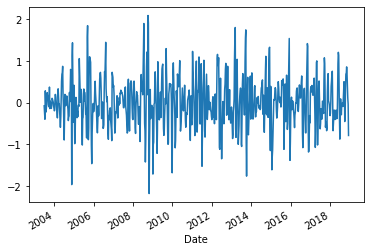

In [ ]:
result_out_rm.resid.plot()

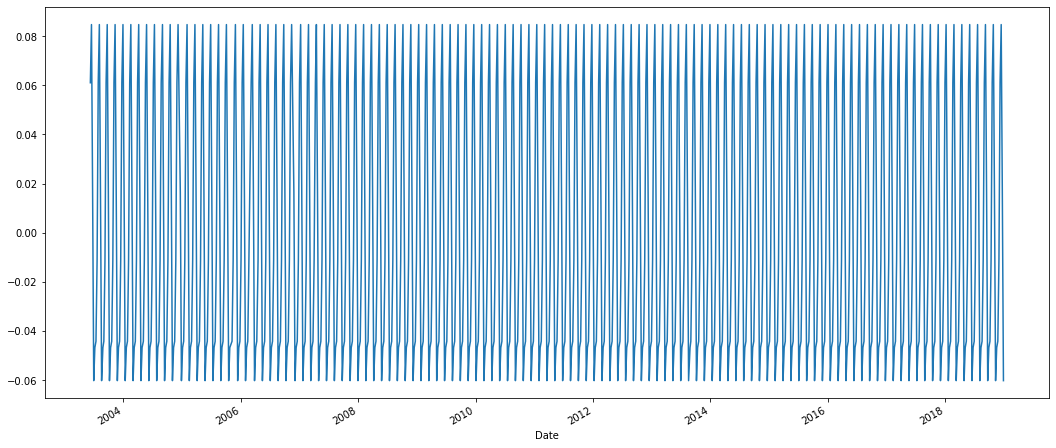

In [ ]:
result_out_rm.seasonal.plot(figsize=(18,8))

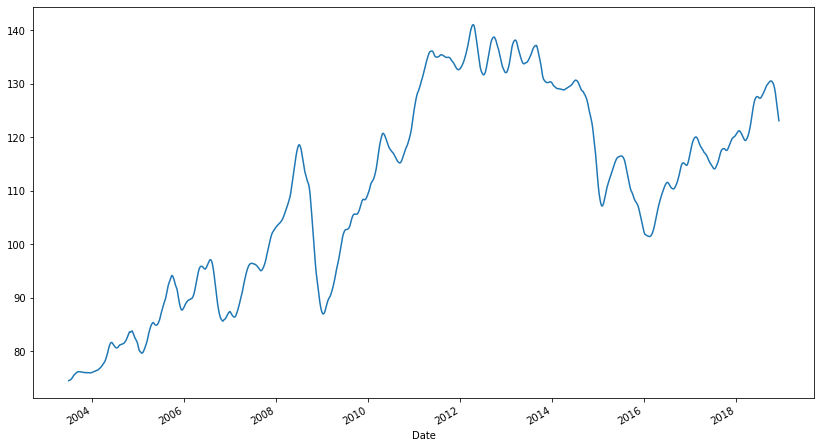

In [ ]:
result_out_rm.trend.plot(figsize=(14,8))

In [ ]:
result_mul_out_rm = seasonal_decompose(petrol_prices_out_rm['Petrol (USD)'], model="multiplicative", freq=7)

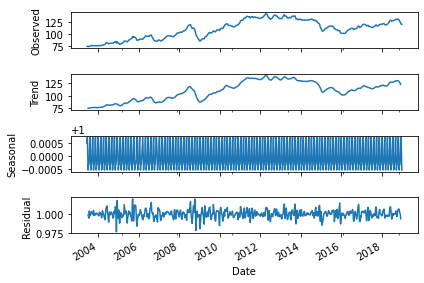

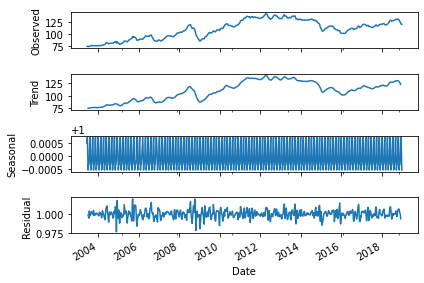

In [ ]:
result_mul_out_rm.plot()

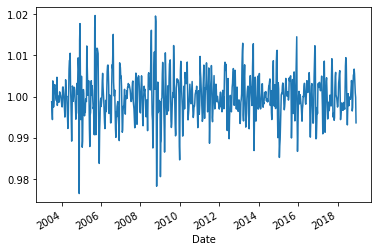

In [ ]:
result_mul_out_rm.resid.plot()

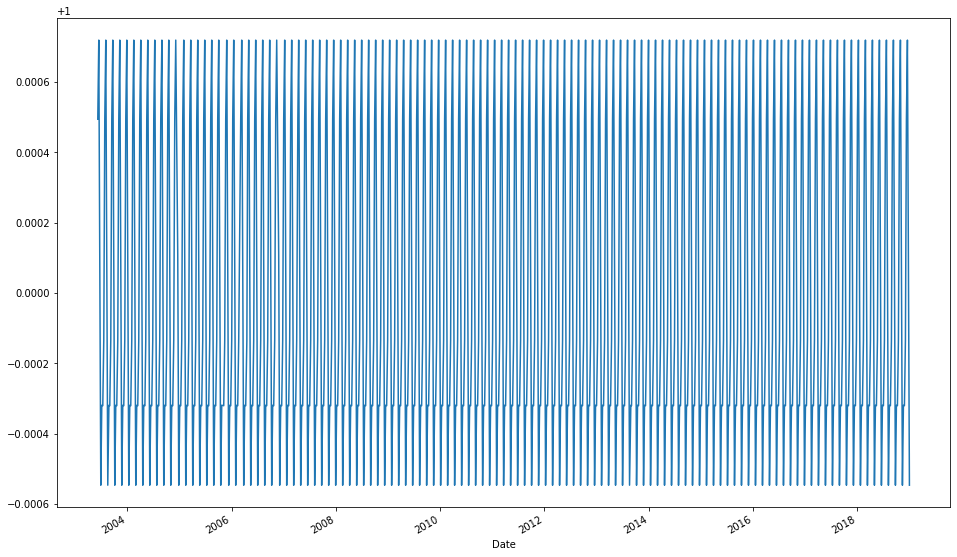

In [ ]:
result_mul_out_rm.seasonal.plot(figsize=(16,10))

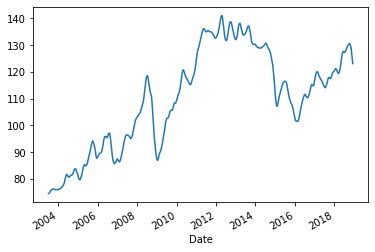

In [ ]:
result_mul_out_rm.trend.plot()

In [ ]:
result_mul_out_rm.trend.head(14)

Date
2003-06-09          NaN
2003-06-16          NaN
2003-06-23          NaN
2003-06-30    74.484286
2003-07-07    74.557143
2003-07-14    74.650000
2003-07-21    74.795714
2003-07-28    75.004286
2003-08-04    75.257143
2003-08-11    75.531429
2003-08-18    75.697143
2003-08-26    75.854286
2003-09-01    76.001429
2003-09-08    76.092857
Name: Petrol (USD), dtype: float64

In [ ]:
result_mul_out_rm.seasonal.head(14)

Date
2003-06-09    1.000494
2003-06-16    1.000719
2003-06-23    1.000109
2003-06-30    0.999453
2003-07-07    0.999681
2003-07-14    0.999679
2003-07-21    0.999865
2003-07-28    1.000494
2003-08-04    1.000719
2003-08-11    1.000109
2003-08-18    0.999453
2003-08-26    0.999681
2003-09-01    0.999679
2003-09-08    0.999865
Name: Petrol (USD), dtype: float64

In [ ]:
result_mul_out_rm.resid.head(14)

Date
2003-06-09         NaN
2003-06-16         NaN
2003-06-23         NaN
2003-06-30    0.998743
2003-07-07    0.996601
2003-07-14    0.994425
2003-07-21    1.003803
2003-07-28    1.000782
2003-08-04    0.997460
2003-08-11    0.998680
2003-08-18    1.002039
2003-08-26    1.002901
2003-09-01    1.002013
2003-09-08    1.001938
Name: Petrol (USD), dtype: float64

In [ ]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, freq=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages
    
    Parameters
    ----------
    x : array-like
        Time series. If 2d, individual series are in columns.
    model : str {"additive", "multiplicative"}
        Type of seasonal component. Abbreviations are accepted.
    filt : array-like
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by two_sided.
    freq : int, optional
        Frequency of the series. Must be used if x is not a pandas object.
        Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
    two_sided : bool
        The moving average method used in filtering.
        If True (default), a centered moving average is computed using the filt.
        If F